In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import math


In [2]:
#Load the dataset

dataset = pd.read_excel(r'C:\Users\Muskan\Desktop\Taxi Fare Project...xlsx')


In [3]:
print(dataset.head())

  unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0  00:26:21     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1  00:52:16    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2  00:35:00     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3  00:30:42     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4  00:51:00     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1  


In [4]:
print(dataset.describe())

             amount  longitude_of_pickup  latitude_of_pickup  \
count  50000.000000         50000.000000        50000.000000   
mean      11.364171           -72.509756           39.933759   
std        9.685557            10.393860            6.224857   
min       -5.000000           -75.423848          -74.006893   
25%        6.000000           -73.992062           40.734880   
50%        8.500000           -73.981840           40.752678   
75%       12.500000           -73.967148           40.767360   
max      200.000000            40.783472          401.083332   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  
count          50000.000000         50000.000000     50000.000000  
mean             -72.504616            39.926251         1.667840  
std               10.407570             6.014737         1.289195  
min              -84.654241           -74.006377         0.000000  
25%              -73.991152            40.734372         1.000000  
50%            

In [5]:
# Remove rows where longitude and latitude is zero
dataset = dataset[(dataset['longitude_of_pickup'] !=0) & (dataset['latitude_of_pickup'] != 0) & (dataset['longitude_of_dropoff'] !=0) & (dataset['no_of_passenger'] != 0) & (dataset['latitude_of_dropoff'] != 0)]
dataset.dropna(inplace=True)

In [6]:
#Remove row where amount is negative or zero
dataset = dataset[dataset['amount'] > 0]

In [7]:
dataset.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,48833.000000,48833.000000,48833.000000,48833.000000,48833.000000,48833.000000
mean,11.368581,-73.927474,40.711185,-73.920731,40.703498,1.674790
std,9.664527,2.311875,2.807166,2.399948,2.293225,1.288864
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992302,40.736471,-73.991327,40.735867,1.000000
50%,8.500000,-73.982116,40.753418,-73.980475,40.754093,1.000000
75%,12.500000,-73.968350,40.767762,-73.965287,40.768473,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
#Convert pickup_datetime to datetime class and extract year, day of week and hour data to see if we can find some patterns.
dataset["date_time_of_pickup"] = pd.to_datetime(dataset["date_time_of_pickup"])
dataset["pickup_year"] = dataset["date_time_of_pickup"].dt.year
dataset["pickup_dow"] = dataset["date_time_of_pickup"].dt.dayofweek
dataset["pickup_hour"] = dataset["date_time_of_pickup"].dt.hour
dataset["pickup_month"] = dataset["date_time_of_pickup"].dt.month

In [9]:
dataset.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_year,pickup_dow,pickup_hour,pickup_month
0,00:26:21,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,6
1,00:52:16,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1
2,00:35:00,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,8
3,00:30:42,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,4
4,00:51:00,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,3


In [10]:
dataset = dataset[(dataset['amount'] > 3) & (dataset['no_of_passenger'] < 6) & (dataset['amount'] < 80)]

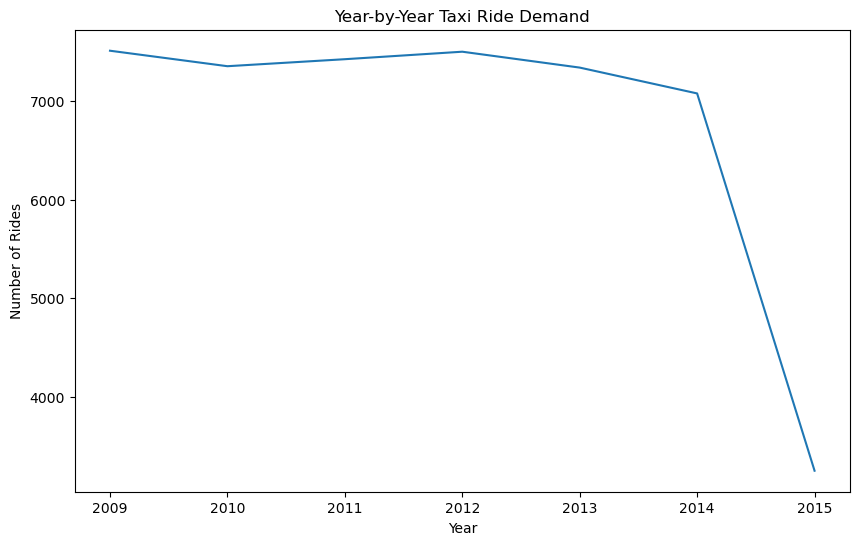

In [11]:
# 1. Year-by-Year Growth or Decline
yearly_data = dataset.groupby("pickup_year").size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_data.index, y=yearly_data.values)
plt.title('Year-by-Year Taxi Ride Demand')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.show()


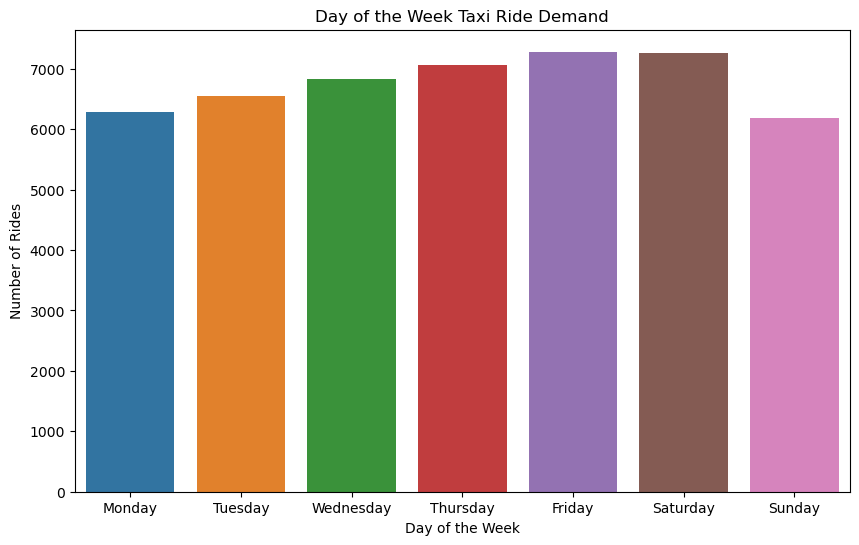

In [12]:
# 2. Day of the Week Demand
dow_data = dataset.groupby("pickup_dow").size()
plt.figure(figsize=(10, 6))
sns.barplot(x=dow_data.index, y=dow_data.values)
plt.title('Day of the Week Taxi Ride Demand')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

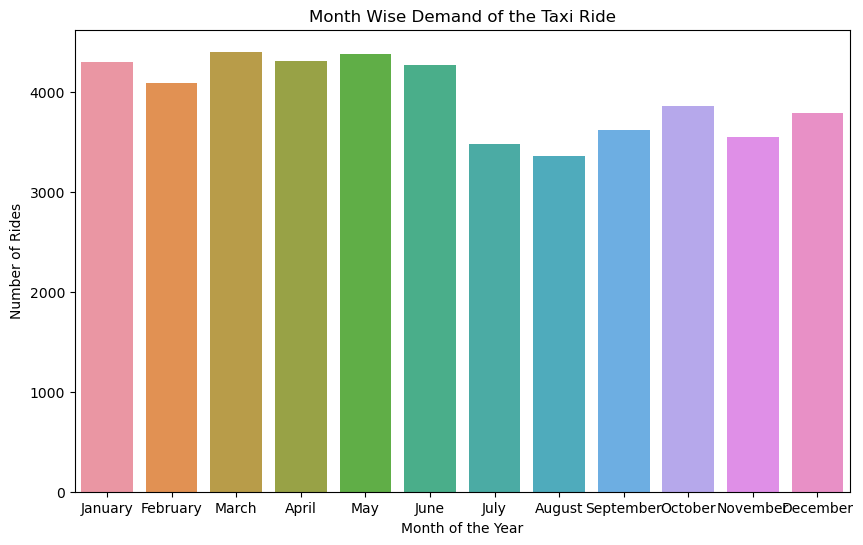

In [13]:
# 2. Month wise demand
dow_data = dataset.groupby("pickup_month").size()
plt.figure(figsize=(10, 6))
sns.barplot(x=dow_data.index, y=dow_data.values)
plt.title('Month Wise Demand of the Taxi Ride')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

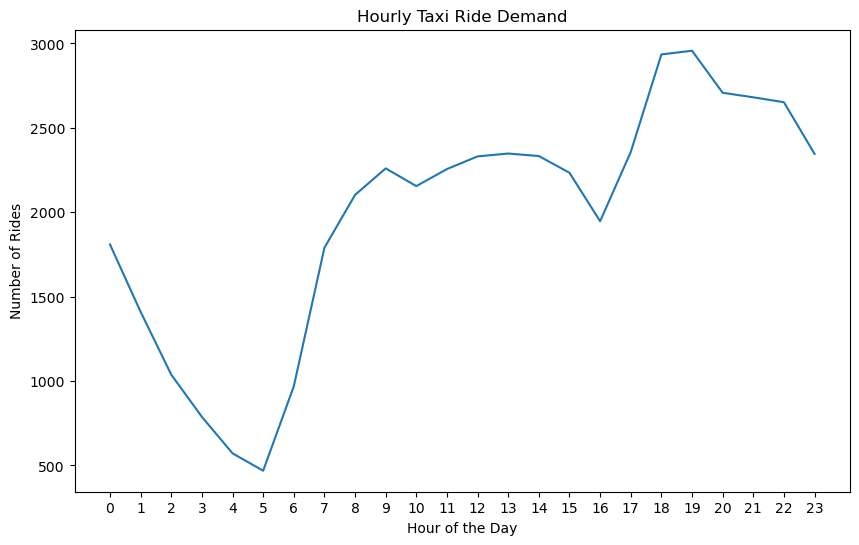

In [14]:
# 3. Hourly Rush Times
hourly_data = dataset.groupby("pickup_hour").size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_data.index, y=hourly_data.values)
plt.title('Hourly Taxi Ride Demand')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(24))
plt.show()

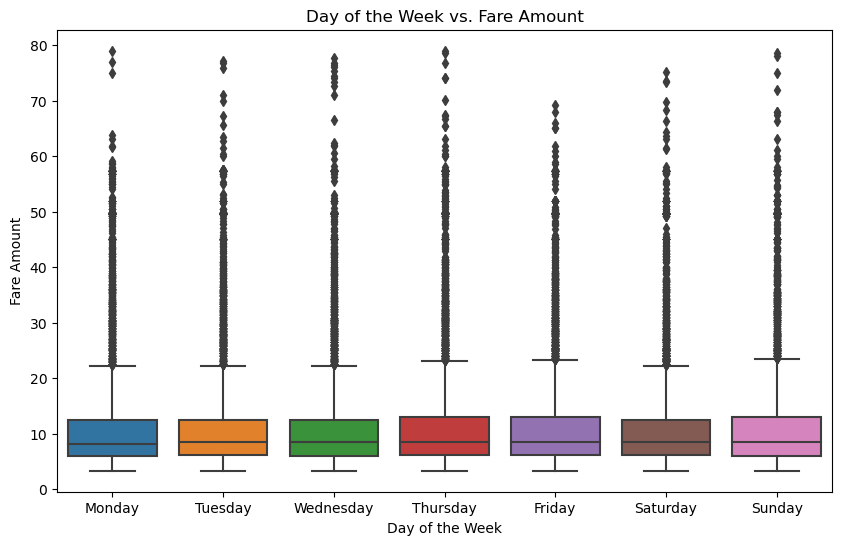

In [15]:
# Box plot for day of the week vs. fare_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_dow', y='amount', data=dataset)
plt.title('Day of the Week vs. Fare Amount')
plt.xlabel('Day of the Week')
plt.ylabel('Fare Amount')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


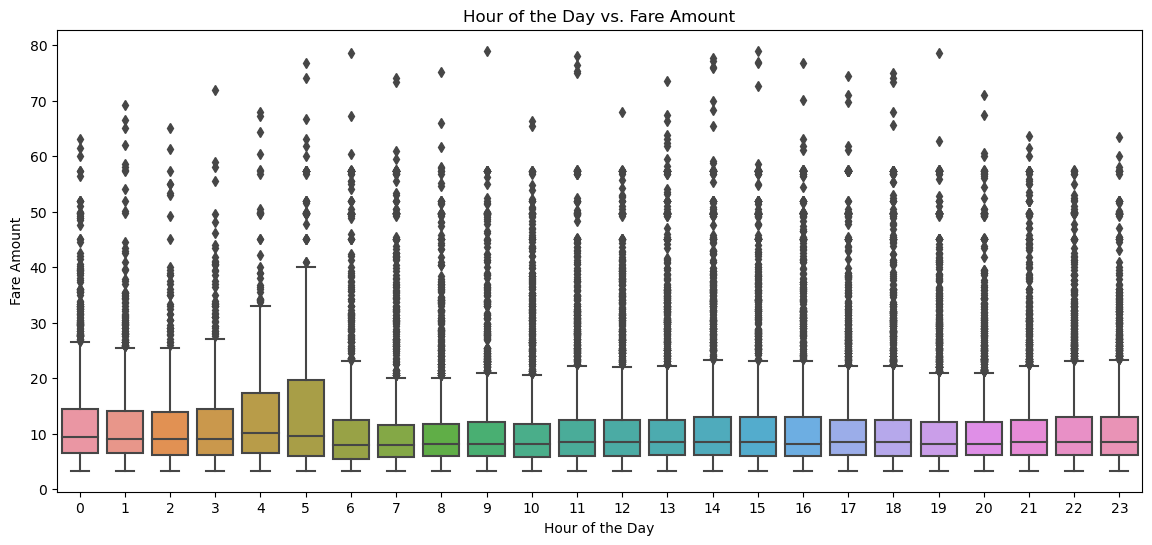

In [16]:
# Box plot for pickup_hour vs. fare_amount
plt.figure(figsize=(14, 6))
sns.boxplot(x='pickup_hour', y='amount', data=dataset)
plt.title('Hour of the Day vs. Fare Amount')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount')
plt.show()


In [17]:
#Extract datetime features
dataset['date_time_of_pickup'] =  pd.to_datetime(dataset['date_time_of_pickup'])
dataset['hour'] = dataset['date_time_of_pickup'].dt.hour
dataset['day'] = dataset['date_time_of_pickup'].dt.day
dataset['month'] = dataset['date_time_of_pickup'].dt.month
dataset['year'] = dataset['date_time_of_pickup'].dt.year
dataset['day_of_week'] = dataset['date_time_of_pickup'].dt.dayofweek



In [18]:
# Define the haversine function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371  # Radius of earth in kilometers
    return c * r

dataset['distance'] = dataset.apply(lambda row: haversine(row['latitude_of_pickup'], 
                                                         row['longitude_of_pickup'], 
                                                         row['latitude_of_dropoff'], 
                                                         row['longitude_of_dropoff']), axis=1)
dataset['distance_per_passenger'] = dataset['distance'] / dataset['no_of_passenger']


In [19]:
# Define features and target variable
X = dataset[['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 
             'latitude_of_dropoff', 'no_of_passenger', 'hour', 'day', 
             'month', 'year', 'day_of_week', 'distance']]
y = dataset['amount']


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
# Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [22]:
y_pred = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))


In [23]:
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Linear Regression MSE: 80.54683000760619
Linear Regression R2: 0.05063789737757274
Mean Absolute Error: 5.713479237508232
Root Mean Squared Error: 8.974788577320703


In [24]:
# Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, dt_preds))
print("Decision Tree R2:", r2_score(y_test, dt_preds))
print("Decision Tree MAE:", mean_absolute_error(y_test, dt_preds))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_preds)))


Decision Tree MSE: 25.401869494204426
Decision Tree R2: 0.7006018457674731
Decision Tree MAE: 2.634785036880927
Decision Tree RMSE: 5.040026735465243


In [25]:
# Random Forest Regressor

rf_regressor = RandomForestRegressor()

# Fit the model to your training data
rf_regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_regressor.predict(X_test)

In [26]:
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)


In [27]:
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2: {r2_rf}")

Random Forest MSE: 12.507930359315068
Random Forest R2: 0.85257576165005


In [29]:
# Predict fares for the entire dataset
dataset['predicted_fare'] = dt.predict(X)

# Calculate the difference between actual and predicted fares
dataset['fare_difference'] = dataset['amount'] - dataset['predicted_fare']

# Display the first few rows to inspect the predictions
print(dataset.head())


  unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0  00:26:21     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1  00:52:16    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2  00:35:00     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3  00:30:42     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4  00:51:00     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  pickup_year  pickup_dow  ...  pickup_month  hour  day  \
0                1         2009           0  ...             6    17   15   
1               